# PROJECT TITLE: LOAN APPROVAL PREDICTION 

# Abstract

With the enhancement in the banking sector lots of people are applying for bank loans but the bank has its limited
assets which it has to grant to limited people only, so finding out to whom the loan can be granted which will be a
safer option for the bank is a typical process. So in this project reducing this risk factor behind selecting
the safe person so as to save lots of bank efforts and assets is done. This is done by mining the Big Data of the previous
records of the people to whom the loan was granted before and on the basis of these records/experiences the
machine was trained using the machine learning model which give the most accurate result. The main objective of
this project is to predict whether assigning the loan to particular person will be safe or not. This project is divided
into four sections (i)Data Collection (ii)Data Preprocessing (iii)Data Visualization (iv) model training and results.

# Introduction

Distribution of the loans is the core business part of almost every banks. The main portion the bank’s assets comes directly came from the profit earned from the loans distributed by the banks. The prime objective in banking environment is to invest their assets in safe hands where it is. Today many banks/financial companies approves loan after a regress process of verification and validation but still there is no surety whether the chosen applicant is the deserving right applicant out of all applicants. Through this system we can predict whether that particular applicant is safe or not and the whole process of validation of features is automated by machine learning technique.

Loan Prediction is very helpful for employee of banks as well as for the applicant also.The Loan Prediction System can automatically calculate the weight of each features taking part in loan processing and on new test data same features are processed with respect to their associated weight .A time limit can be set for the applicant to check whether his/her loan can be sanctioned or not. Loan Prediction System allows jumping to specific application so that it can be check on priority basis. 

# Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.
   
Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)

# Architecture

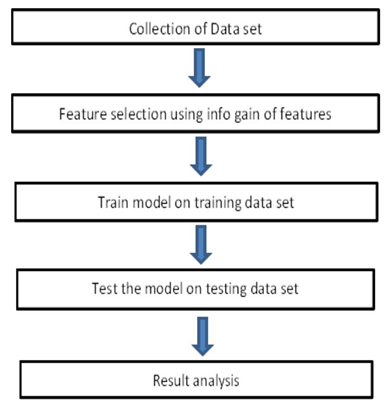

# Implementation In Python

# Import Modules

In [61]:
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [62]:
df=pd.read_csv('Loan_Data.csv')

In [63]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [64]:
df.info() #get info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [65]:
df.describe() #get the statistic info about the numerical columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# DataPreprocessing 

# fill missing values

In [66]:
df.isna().sum() #check the total number of na values

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [67]:
df.isnull().sum()
#(df.iloc[:,1:13] == 0).sum() #find zeros in all the columns

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [68]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [69]:
for i in df.columns: #fill na values with median values 
    if (df[i].dtype=='object'):
         df[i]=df[i].fillna(df[i].mode().iloc[0])
   

# Label Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder 

In [71]:
lb_make= LabelEncoder() #recode the catergorical values 
df['Gender']=lb_make.fit_transform(df.Gender)# 1male 0 female
df['Married']=lb_make.fit_transform(df.Married)

df['Education']=lb_make.fit_transform(df.Education)
df['Self_Employed']=lb_make.fit_transform(df.Self_Employed)

df['Property_Area']=lb_make.fit_transform(df.Property_Area)
#df['Property_Area']=df['Property_Area'].replace({"Urban": 1, "Rural": 2,"Semiurban": 3}, inplace=True)
df['Loan_Status']=lb_make.fit_transform(df.Loan_Status)

In [72]:
df['Dependents']=df['Dependents'].str.replace(r'\D', '')# remove extra characters 
df.Dependents=pd.to_numeric(df.Dependents)

In [73]:
df.drop('Loan_ID',axis=1,inplace=True)#drop loan id

# Visualization

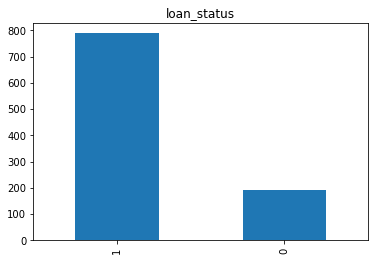

In [74]:
df['Loan_Status'].value_counts(normalize=True)  #normalization
df['Loan_Status'].value_counts().plot.bar(title='loan_status')

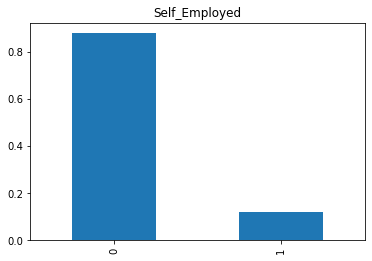

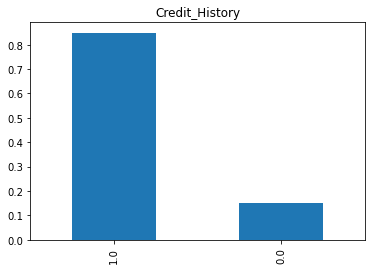

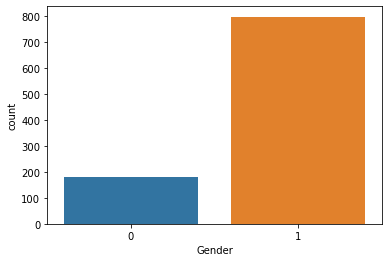

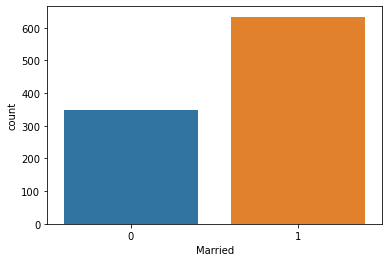

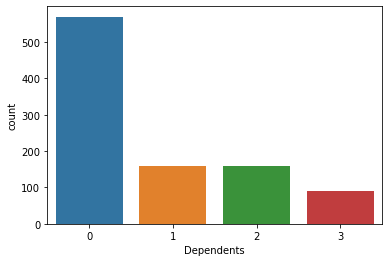

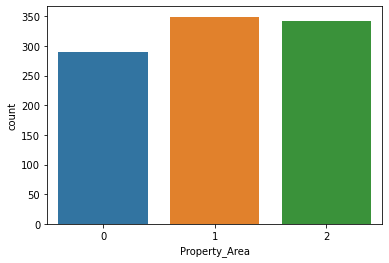

In [126]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

sns.countplot(df['Gender'])
plt.show()
sns.countplot(df['Married'])
plt.show()
sns.countplot(df['Dependents'])
plt.show()
sns.countplot(df['Property_Area'])

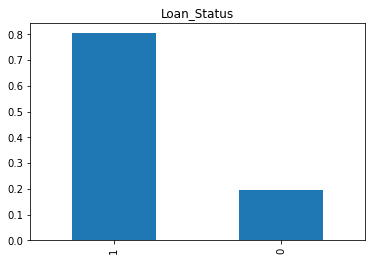

In [76]:
df['Loan_Status'].value_counts(normalize=True).plot.bar( title='Loan_Status')
plt.show()

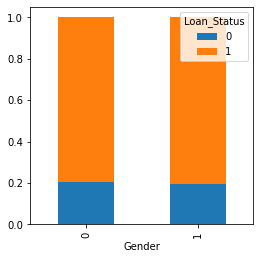

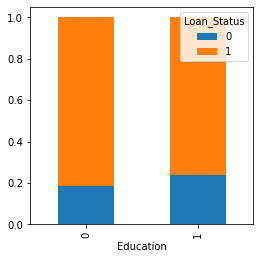

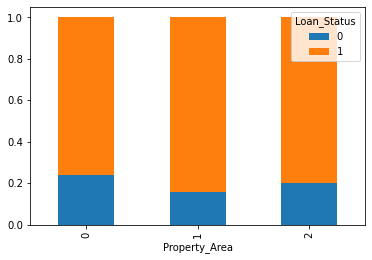

In [124]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

# Outlier Detection

Text(0.5, 0.98, '')

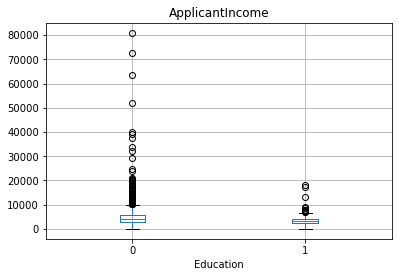

In [78]:
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle('')

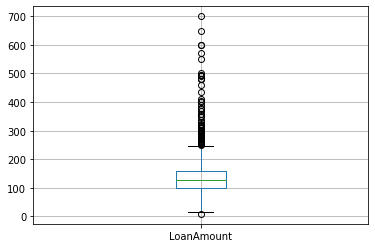

In [79]:
df.boxplot('LoanAmount')

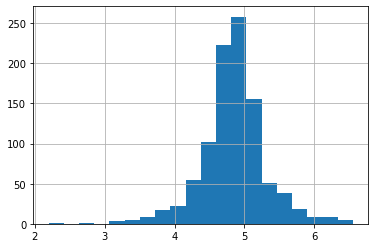

In [80]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)


# Log Transformation

In [81]:
df['LoanAmount_log']=np.log(df['LoanAmount'])


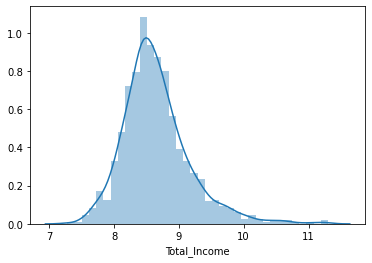

In [82]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
sns.distplot(np.log(df['Total_Income']))

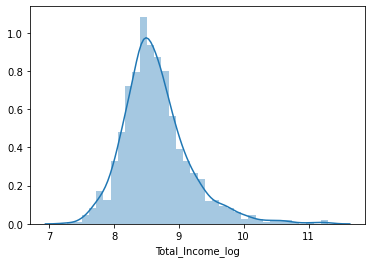

In [83]:
df['Total_Income_log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_log'])

In [84]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
Gender,1.000000,0.327012,0.139248,0.040649,0.024719,0.060444,0.082428,0.095866,-0.069058,0.018627,-0.020801,0.009116,0.123055,0.094346,0.167323
Married,0.327012,1.000000,0.344291,0.026211,0.013666,0.052126,0.061606,0.155463,-0.047505,0.021738,0.006372,0.059570,0.180598,0.077085,0.151465
Dependents,0.139248,0.344291,1.000000,0.084894,0.026241,0.122136,0.003223,0.149722,-0.084190,-0.045335,0.018639,0.018397,0.134937,0.116923,0.112517
Education,0.040649,0.026211,0.084894,1.000000,-0.010848,-0.138909,-0.060380,-0.163174,-0.021575,-0.062416,-0.050685,-0.057680,-0.143129,-0.158577,-0.215370
Self_Employed,0.024719,0.013666,0.026241,-0.010848,1.000000,0.113106,-0.018861,0.107061,-0.031451,0.034485,-0.059678,-0.021323,0.096043,0.098419,0.157912
ApplicantIncome,0.060444,0.052126,0.122136,-0.138909,0.113106,1.000000,-0.114247,0.546241,-0.023823,0.020201,0.005513,-0.023077,0.417236,0.893847,0.707843
CoapplicantIncome,0.082428,0.061606,0.003223,-0.060380,-0.018861,-0.114247,1.000000,0.179327,-0.042750,-0.011531,-0.024921,-0.050084,0.193742,0.343317,0.402275
LoanAmount,0.095866,0.155463,0.149722,-0.163174,0.107061,0.546241,0.179327,1.000000,0.052775,-0.003005,-0.036888,-0.049868,0.901467,0.597357,0.663366
Loan_Amount_Term,-0.069058,-0.047505,-0.084190,-0.021575,-0.031451,-0.023823,-0.042750,0.052775,1.000000,-0.021495,-0.041144,-0.015291,0.104715,-0.041817,-0.035838
Credit_History,0.018627,0.021738,-0.045335,-0.062416,0.034485,0.020201,-0.011531,-0.003005,-0.021495,1.000000,0.024342,0.380696,-0.030598,0.013894,0.040516


# Corelation Matrix

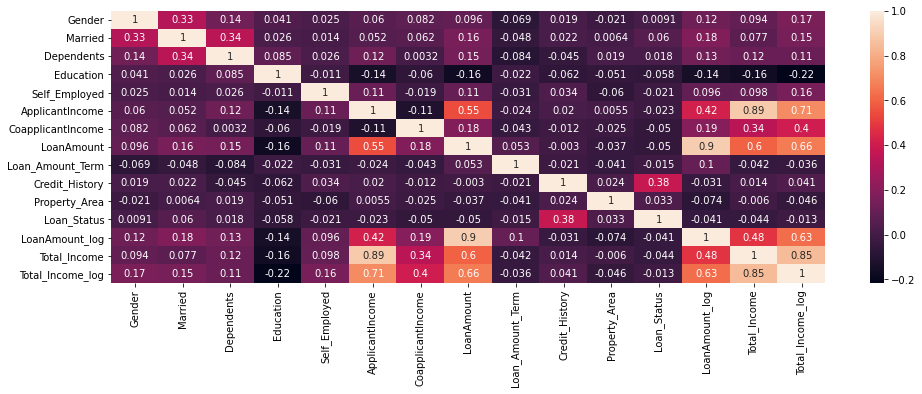

In [85]:
plt.figure(figsize = (16,5))

#ax = sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)
ax=sns.heatmap(df.corr(),annot=True)

# Model Training

In [86]:
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [87]:
X=df.drop(['Loan_Status','LoanAmount_log','Total_Income','Total_Income_log'],axis=1)
#X=df[['Credit_Histo']]
y=df[['Loan_Status']]

In [88]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
976,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2
977,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2
978,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1
979,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0


In [89]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
976,1
977,1
978,1
979,1


In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [91]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
572,1,1,2,0,0,16666,0.0,275.0,360.0,1.0,2
849,1,0,0,0,0,2231,2774.0,176.0,360.0,0.0,2
906,1,0,0,1,0,3271,0.0,90.0,360.0,1.0,0
432,1,0,0,0,0,12876,0.0,405.0,360.0,1.0,1
228,1,1,0,0,0,4758,0.0,158.0,480.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,1,1,2,0,0,11417,1126.0,225.0,360.0,1.0,2
270,0,0,0,0,0,3237,0.0,30.0,360.0,1.0,2
860,1,1,2,0,1,5000,2166.0,150.0,360.0,1.0,2
435,0,1,0,0,0,10047,0.0,126.0,240.0,1.0,1


In [92]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
789,1,1,2,0,0,4912,4614.0,160.0,360.0,1.0,0
497,1,1,0,0,0,4625,2857.0,111.0,12.0,1.0,2
139,1,1,2,1,0,4200,1430.0,129.0,360.0,1.0,0
570,1,1,1,0,0,3417,1750.0,186.0,360.0,1.0,2
66,1,0,0,1,0,3200,2254.0,126.0,180.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
758,1,1,2,0,1,10890,0.0,260.0,12.0,1.0,0
567,1,1,3,0,0,3400,2500.0,123.0,360.0,0.0,0
916,0,0,0,0,1,14987,0.0,177.0,360.0,1.0,0
889,1,1,3,0,0,2773,1497.0,108.0,360.0,1.0,1


In [93]:
y_train

,Loan_Status
572,1
849,1
906,1
432,1
228,1
...,...
106,1
270,1
860,1
435,1


In [94]:
y_test

,Loan_Status
789,1
497,1
139,0
570,1
66,0
...,...
758,1
567,0
916,1
889,1


# Logistic Regression

In [95]:
lm=LogisticRegression(random_state=10)
lm.fit(X_train,y_train)
ypred=lm.predict(X_test)

print(ypred)

[1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [96]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,1,4.836282,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2,1,4.727388,5786.0,8.663196
977,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2,1,4.744932,4867.0,8.490233
978,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1,1,4.836282,5243.0,8.564649
979,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0,1,5.062595,7393.0,8.908289


In [97]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.71      0.19      0.30        63
           1       0.82      0.98      0.89       232

    accuracy                           0.81       295
   macro avg       0.76      0.58      0.60       295
weighted avg       0.79      0.81      0.76       295



In [98]:
accuracy_score(y_test,ypred)

0.8101694915254237

In [99]:
confusion_matrix(y_test,ypred)

array([[ 12,  51],
       [  5, 227]], dtype=int64)

In [100]:
f1_score(y_test,ypred)

0.8901960784313726

# Decision Tree

In [101]:
tree_clf=DecisionTreeClassifier() #decison tree algorithm 
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
ypred_tree=tree_clf.predict(X_test)
print(ypred_tree)

[1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]


In [103]:
accuracy_score(y_test,ypred_tree)


0.7559322033898305

In [104]:
f1_score(y_test,ypred_tree)

0.8487394957983194

In [105]:
print(classification_report(y_test, ypred_tree))

              precision    recall  f1-score   support

           0       0.41      0.33      0.37        63
           1       0.83      0.87      0.85       232

    accuracy                           0.76       295
   macro avg       0.62      0.60      0.61       295
weighted avg       0.74      0.76      0.75       295



# Random forest Algorithm

In [106]:
forest=RandomForestClassifier() #random forest 
forest.fit(X_train,y_train)
ypred_f=forest.predict(X_test)
print(ypred_f)

[1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]


In [107]:
accuracy_score(y_test,ypred_f)

0.8

In [108]:
f1_score(y_test,ypred_f)

0.8836291913214991

In [109]:
print(classification_report(y_test, ypred_f))

              precision    recall  f1-score   support

           0       0.60      0.19      0.29        63
           1       0.81      0.97      0.88       232

    accuracy                           0.80       295
   macro avg       0.71      0.58      0.59       295
weighted avg       0.77      0.80      0.76       295



# Confusion Matrix 

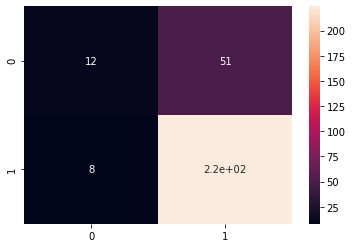

In [114]:
cm = confusion_matrix(y_test, ypred_f)
cm
sns.heatmap(cm, annot=True)

# Support Vector Machine

In [116]:
from sklearn.svm import SVC
svc_m=SVC()
svc_m.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
yp=svc_m.predict(X_test)

In [118]:
accuracy_score(y_test,yp)

0.7864406779661017

In [119]:
f1_score(y_test,yp)

0.8804554079696395

# Conclusion

The Data Mining process started from data cleaning and preprocessing, Missing value imputations, then Visualization and finally model building and evaluation. The best accuracy on the test set is 0.8101 for logistic regression,0.7559 for decsion tree,0.80 for random forest and 0.786 for svm. This brings some of the following insights about approval.
Applicants with Credit history not passing fails to get approved, Probably because that they have a probability of a not paying back.
Most of the Time, Applicants with high income sanctioning low amount is to more likely get approved which make sense, more likely to pay back their loans. Some basic characteristic gender and marital status seems not to be taken into consideration by the company.